In [1]:
"""
Geographic Spectral Visualization tools for a subset of a hyperspectral image.
This notebook is to visualize refectances over a time series for a sub-area(chunk) of a hyperspectral image.

Author: Michael Kiper (michael.a.kiper@jpl.nasa.gov) - feel free to reach out with questions/comments/suggestions
"""

'\nGeographic Spectral Visualization tools for a subset of a hyperspectral image.\nThis notebook is to visualize refectances over a time series for a sub-area(chunk) of a hyperspectral image.\n\nAuthor: Michael Kiper (michael.a.kiper@jpl.nasa.gov) - feel free to reach out with questions/comments/suggestions\n'

In [2]:
import numpy as np
import os
from osgeo import gdal
import matplotlib.pyplot as plt 
import sys
import ipywidgets as widgets

In [3]:
# Hard-coded wavelengths and dates - feel free to instead assign these values to lists in files * keep same data type format though
WAVELENGTHS = ( 377.071821 , 382.081821 , 387.091821 , 392.10182100000003 , 397.10182100000003 , 402.11182099999996 , 407.121821 , 412.131821 , 417.14182100000005 , 422.151821 , 427.161821 , 432.171821 , 437.171821 , 442.18182099999996 , 447.191821 , 452.201821 , 457.21182100000004 , 462.221821 , 467.23182099999997 , 472.23182099999997 , 477.241821 , 482.251821 , 487.261821 , 492.271821 , 497.28182100000004 , 502.291821 , 507.30182099999996 , 512.301821 , 517.3118209999999 , 522.321821 , 527.331821 , 532.3418210000001 , 537.351821 , 542.361821 , 547.361821 , 552.3718210000001 , 557.381821 , 562.3918209999999 , 567.401821 , 572.411821 , 577.4218209999999 , 582.431821 , 587.431821 , 592.441821 , 597.451821 , 602.461821 , 607.471821 , 612.4818210000001 , 617.491821 , 622.491821 , 627.501821 , 632.511821 , 637.521821 , 642.5318209999999 , 647.541821 , 652.551821 , 657.561821 , 662.561821 , 667.571821 , 672.581821 , 677.591821 , 682.601821 , 687.611821 , 692.6218210000001 , 697.6218210000001 , 702.631821 , 707.6418209999999 , 712.651821 , 717.661821 , 722.671821 , 727.681821 , 732.691821 , 737.691821 , 742.701821 , 747.711821 , 752.721821 , 757.7318210000001 , 762.741821 , 767.751821 , 772.751821 , 777.761821 , 782.7718209999999 , 787.781821 , 792.791821 , 797.801821 , 802.811821 , 807.821821 , 812.821821 , 817.831821 , 822.841821 , 827.851821 , 832.861821 , 837.8718210000001 , 842.881821 , 847.881821 , 852.891821 , 857.901821 , 862.9118209999999 , 867.921821 , 872.931821 , 877.941821 , 882.951821 , 887.951821 , 892.961821 , 897.971821 , 902.981821 , 907.991821 , 913.0018210000001 , 918.011821 , 923.0218209999999 , 928.0218209999999 , 933.031821 , 938.041821 , 943.0518209999999 , 948.061821 , 953.071821 , 958.081821 , 963.081821 , 968.091821 , 973.101821 , 978.1118210000001 , 983.121821 , 988.131821 , 993.141821 , 998.151821 , 1003.1518210000002 , 1008.161821 , 1013.171821 , 1018.181821 , 1023.1918209999999 , 1028.2018209999999 , 1033.211821 , 1038.2118209999999 , 1043.2218209999999 , 1048.2318209999999 , 1053.241821 , 1058.251821 , 1063.261821 , 1068.271821 , 1073.2818209999998 , 1078.281821 , 1083.291821 , 1088.301821 , 1093.311821 , 1098.321821 , 1103.331821 , 1108.341821 , 1113.341821 , 1118.351821 , 1123.361821 , 1128.371821 , 1133.381821 , 1138.391821 , 1143.4018210000002 , 1148.4118210000001 , 1153.411821 , 1158.421821 , 1163.4318210000001 , 1168.4418210000001 , 1173.451821 , 1178.4618209999999 , 1183.4718209999999 , 1188.471821 , 1193.481821 , 1198.4918209999998 , 1203.5018209999998 , 1208.511821 , 1213.521821 , 1218.531821 , 1223.541821 , 1228.541821 , 1233.551821 , 1238.561821 , 1243.571821 , 1248.581821 , 1253.5918210000002 , 1258.601821 , 1263.601821 , 1268.611821 , 1273.6218210000002 , 1278.631821 , 1283.641821 , 1288.651821 , 1293.661821 , 1298.671821 , 1303.671821 , 1308.681821 , 1313.691821 , 1318.701821 , 1323.711821 , 1328.721821 , 1333.731821 , 1338.731821 , 1343.741821 , 1348.751821 , 1353.761821 , 1358.771821 , 1363.7818209999998 , 1368.791821 , 1373.801821 , 1378.801821 , 1383.811821 , 1388.821821 , 1393.831821 , 1398.841821 , 1403.851821 , 1408.861821 , 1413.861821 , 1418.871821 , 1423.881821 , 1428.891821 , 1433.9018210000002 , 1438.9118210000001 , 1443.921821 , 1448.931821 , 1453.9318210000001 , 1458.9418210000001 , 1463.9518209999999 , 1468.9618209999999 , 1473.9718209999999 , 1478.981821 , 1483.991821 , 1488.9918209999998 , 1494.0018209999998 , 1499.011821 , 1504.021821 , 1509.031821 , 1514.041821 , 1519.051821 , 1524.061821 , 1529.061821 , 1534.071821 , 1539.081821 , 1544.091821 , 1549.101821 , 1554.111821 , 1559.121821 , 1564.1218210000002 , 1569.131821 , 1574.141821 , 1579.151821 , 1584.161821 , 1589.1718210000001 , 1594.1818210000001 , 1599.1918210000001 , 1604.191821 , 1609.201821 , 1614.211821 , 1619.221821 , 1624.2318209999999 , 1629.2418209999998 , 1634.251821 , 1639.251821 , 1644.261821 , 1649.2718209999998 , 1654.281821 , 1659.291821 , 1664.301821 , 1669.311821 , 1674.321821 , 1679.321821 , 1684.331821 , 1689.341821 , 1694.351821 , 1699.3618210000002 , 1704.371821 , 1709.381821 , 1714.381821 , 1719.3918210000002 , 1724.4018210000002 , 1729.411821 , 1734.421821 , 1739.431821 , 1744.441821 , 1749.451821 , 1754.4518209999999 , 1759.4618209999999 , 1764.471821 , 1769.481821 , 1774.491821 , 1779.501821 , 1784.511821 , 1789.511821 , 1794.521821 , 1799.531821 , 1804.541821 , 1809.5518209999998 , 1814.561821 , 1819.571821 , 1824.581821 , 1829.5818210000002 , 1834.591821 , 1839.601821 , 1844.611821 , 1849.621821 , 1854.631821 , 1859.6418210000002 , 1864.6518210000002 , 1869.651821 , 1874.661821 , 1879.6718210000001 , 1884.6818210000001 , 1889.691821 , 1894.7018209999999 , 1899.7118209999999 , 1904.711821 , 1909.721821 , 1914.7318209999999 , 1919.7418209999998 , 1924.751821 , 1929.761821 , 1934.771821 , 1939.781821 , 1944.781821 , 1949.791821 , 1954.801821 , 1959.811821 , 1964.821821 , 1969.831821 , 1974.841821 , 1979.841821 , 1984.851821 , 1989.8618210000002 , 1994.871821 , 1999.881821 , 2004.8918210000002 , 2009.9018210000002 , 2014.9118210000001 , 2019.911821 , 2024.921821 , 2029.931821 , 2034.941821 , 2039.9518209999999 , 2044.9618209999999 , 2049.971821 , 2054.971821 , 2059.981821 , 2064.991821 , 2070.001821 , 2075.011821 , 2080.021821 , 2085.031821 , 2090.041821 , 2095.0418210000003 , 2100.051821 , 2105.0618210000002 , 2110.071821 , 2115.0818209999998 , 2120.091821 , 2125.1018209999997 , 2130.1018209999997 , 2135.111821 , 2140.121821 , 2145.131821 , 2150.141821 , 2155.151821 , 2160.161821 , 2165.171821 , 2170.171821 , 2175.1818209999997 , 2180.1918210000003 , 2185.201821 , 2190.2118210000003 , 2195.221821 , 2200.231821 , 2205.231821 , 2210.241821 , 2215.251821 , 2220.2618209999996 , 2225.2718210000003 , 2230.281821 , 2235.2918210000003 , 2240.301821 , 2245.301821 , 2250.311821 , 2255.321821 , 2260.3318209999998 , 2265.341821 , 2270.351821 , 2275.361821 , 2280.361821 , 2285.371821 , 2290.381821 , 2295.391821 , 2300.401821 , 2305.4118209999997 , 2310.421821 , 2315.4318209999997 , 2320.431821 , 2325.441821 , 2330.451821 , 2335.461821 , 2340.471821 , 2345.481821 , 2350.491821 , 2355.491821 , 2360.5018210000003 , 2365.511821 , 2370.5218210000003 , 2375.531821 , 2380.541821 , 2385.551821 , 2390.561821 , 2395.561821 , 2400.571821 , 2405.581821 , 2410.591821 , 2415.601821 , 2420.611821 , 2425.621821 , 2430.6218209999997 , 2435.631821 , 2440.6418209999997 , 2445.651821 , 2450.661821 , 2455.6718210000004 , 2460.681821 , 2465.691821 , 2470.691821 , 2475.701821 , 2480.711821 , 2485.7218209999996 , 2490.731821 , 2495.741821 , 2500.7518210000003)
DATES = ['20220224', '20220228', '20220308', '20220316', '20220322', '20220405', '20220412', '20220420', '20220429', '20220503', '20220511', '20220517', '20220529']

In [4]:
"""
The refectances are supposed to be stored/passed through functions as a dictionary:
    • {date (string): 3-D_matrix_of_refectances (np.array)}
"""

'\nThe refectances are supposed to be stored/passed through functions as a dictionary:\n    • {date (string): 3-D_matrix_of_refectances (np.array)}\n'

In [5]:
# Dataset-based functions

def open_gdal_file(f:str):
    """
    Opens the GDAl-readable file
    
    Parameters:
    • f (str): the path to target file
    
    Returns:
    • the raster dataset
    """
    raster = gdal.Open(target_path)
    print(f"X: {raster.RasterXSize}, Y: {raster.RasterYSize}, Z: {raster.RasterCount}")
    return raster

def get_shape(reflectances:dict) -> tuple:
    """
    Gets the shape of the datset for the reflectance time-series 
    
    Parameters:
    • reflectances (dict): reflectances dictionary
    
    Returns:
    • tuple of the dateset shape
    """
    
    k = list(reflectances.keys())[0]
    shape = reflectances[k].shape
    return shape

def unshape(ds:np.array) -> np.array:
    """
    Reshapes the (Band_refelctances, Y_pixel_index, X_pixel_index) into (X_pixel_index, Y_pixel_index, Band_refelctances) 
    *** NEEDED FOR PLOTTING FUNCTIONS
    
    Parameters:
    • ds (np.array) : dataset of shape: (Band_refelctances, Y_pixel_index, X_pixel_index)
    • sanity_plot (boolean) : plot a comparision of the before and after refelectances to make sure they match
    
    Returns:
    • np.array of shape (X_pixel_index, Y_pixel_index, Band_refelctances)
    """
    void_maxtrix = np.zeros(ds.shape[::-1])
    void_maxtrix[void_maxtrix==0] = np.nan
    
    # input the void_maxtrix with correct values
    for x_val in range(ds.shape[2]):
        for y_val in range(ds.shape[1]):
            wl = ds[:, y_val, x_val]
            void_maxtrix[x_val, y_val] = wl
        
    return void_maxtrix

def index_reshape(ds:np.array, sanity_plot=False) -> np.array:
    """
    Reshapes the (Band_refelctances, Y_pixel_index, X_pixel_index) into (X_pixel_index, Y_pixel_index, Band_refelctances) 
    *** NEEDED FOR PLOTTING FUNCTIONS
    
    Parameters:
    • ds (np.array) : dataset of shape: (Band_refelctances, Y_pixel_index, X_pixel_index)
    • sanity_plot (boolean) : plot a comparision of the before and after refelectances to make sure they match
    
    Returns:
    • np.array of shape (X_pixel_index, Y_pixel_index, Band_refelctances)
    """
    void_maxtrix = np.zeros(ds.shape[::-1])
    void_maxtrix[void_maxtrix==0] = np.nan
    
    # input the void_maxtrix with correct values
    for x_val in range(ds.shape[2]):
        for y_val in range(ds.shape[1]):
            wl = ds[:, y_val, x_val]
            void_maxtrix[x_val, y_val] = wl
        
    if sanity_plot:
        fig = plt.figure(figsize=(15,4))
        
        ax1 = fig.add_subplot(1,2,1)
        plt.plot(ds[:,0,0])
        ax1.set_xlabel("Wavelength (nm)", fontsize=15)
        ax1.set_ylabel("Reflectance", fontsize=15)
        ax1.set_title("Original", fontsize=18)
        ax1.grid('on')

        ax2 = fig.add_subplot(1,2,2)
        plt.plot(void_maxtrix[0,0,:])
        ax2.set_xlabel("Wavelength (nm)", fontsize=15)
        ax2.set_ylabel("Reflectance", fontsize=15)
        ax2.set_title("Reshaped", fontsize=18)
        ax2.grid('on')
        
    return void_maxtrix


def get_chunk_via_pixel(raster, x_start:int, y_start:int, x_length:int, y_length:int, rm_wb:bool=False, reshape=True, nan=True) -> np.array:
    """
    Returns a small area from the whole dataset image - indexed via image pixel location, NOT geo-coordinates
    
    Parameters:
    • raster : GDAL raster object
    • x_start (int), y_start (int) : the top left x,y pixel locations of the area to get
    • x_length (int), y_length (int) : the length and width of how many pixels to get from the image
    • [Optional] reshape (boolean) : reshape the chunk into a matrix of X_pixel_index, Y_pixel_index, Band_refelctance - RECOMMENDED (needed for plotting functions). 
                                     Otherwise shape will be (Band_refelctance, Y_pixel_index, X_pixel_index)
        • Default: True
    • [Optional] nan (boolen) : change all -9999 reflectance values to NaNs - RECOMMENDED
        • Default: True
    • [Optional] rm_wb (boolen) : remove water bands
        • Default: False
    
    Returns:
    • np.array
    """
    chunk = raster.ReadAsArray(xoff=x_start, yoff=y_start, xsize=x_length, ysize=y_length)
    
    if nan:
        chunk[chunk==-9999] = np.nan
    if reshape:
        chunk = index_reshape(chunk)
        
    if rm_wb:
        chunk = remove_water_bands(chunk)
    
    return chunk

def remove_water_bands(ds: np.array, wavelengths=None, band_ranges=None) -> np.array:
    """
    Takes in an array of reflectances and NaNs all the water band values
    THERE MUST BE A GLOBAL VARIABLE CALLED 'wavelengths' OR INPUT WAVELENGTHS
    
    Parameters:
    • ds (np.array) : an array of the reflectances to take out
    • [Optional] wavelengths (None or list(float)) : optional hard list of wavelengths that correspond to 'ds' values
    • [Optional] band_ranges (None or list(tuple)) : optional list of tuples (wavelength_start, wavelength_end) to omit
    """
    if wavelengths is None:
        global WAVELENGTHS
    else:
        WAVELENGTHS = wavelengths
    try:
        wl = np.array(list(WAVELENGTHS))
    except Exception as e:
        print("there must be a global variable called 'WAVELENGTHS' or a specified 'wavelengths' list")
        raise Exception(e)
        
    if band_ranges is None:
        band_ranges = [(1340, 1460), (1800, 2050)]
    
    for bands in band_ranges:
        ds[np.logical_and(wl > bands[0], wl < bands[1])] = np.nan
        
    return ds

# for generating reflectance data dictionary from a file path
def reflectance_time_series_from_files(dates:list, target_paths:list, x_start:int, y_start:int, x_length:int, y_length:int, remove_water_bands=True, **kwargs) -> dict:
    """
    Generates the entire reflectance datset dictionary set from a given file path/paths
    
    Parameters:
    • dates (list[string]) : a list of all the desired dates (date labels)
    • target_paths (list) : a list of all the locations of the files to read
    • x_start (int), y_start (int) : the top left x,y pixel locations of the area to get
    • x_length (int), y_length (int) : the length and width of how many pixels to get from the image
    • [Optional] remove_water_bands (boolen) : remove water bands
        • Default: True
    
    Returns:
    • reflectances (dict) : reflectances dictionary
    """
    if len(dates) != len(target_paths):
        raise Exception("Date list length and number of target file paths must match")
        
    reflectances = {}
    i=1
    # try:
    for j, date in enumerate(dates):
        target_path = target_paths[j]
        raster = gdal.Open(target_path)

        reshape = kwargs['reshape'] if 'reshape' in list(kwargs.keys()) else True
        nan = kwargs['nan'] if 'nan' in list(kwargs.keys()) else True

        chunk = get_chunk_via_pixel(raster, x_start, y_start, x_length, y_length, remove_water_bands, reshape=reshape, nan=nan)

        reflectances[date] = chunk

        # print out progress
        if len(dates)>25:
            sys.stdout.write('\r')
            if i % int(len(dates)*0.05) == 0:
                per = int(i/len(dates)*100)+1
                e,s = "="*int(per/5), " "*(20-int(per/5))
                sys.stdout.write(f"[{e}{s}] {per}%  Dataset Completed: {i+1}")
                sys.stdout.flush()
        else:
            sys.stdout.write('\r')
            per = int(i/len(dates)*100)
            e,s = "="*int(i), " "*(len(dates)-i)
            sys.stdout.write(f"[{e}{s}] {per}%  Dataset Completed: {i}")
            sys.stdout.flush()

        i+=1
                
    return reflectances
    
def valid_reflectance_format(reflectances:dict) -> bool:
    """
    Find out if the dictionary given will work for the plots
    
    Parameters:
    • reflectances (dict) : reflectances dictionary
    
    Returns:
    • boolean
    """
    if type(reflectances) != dict:
        print("given reflectances is not a dictionary")
        return False
    
    for key, val in reflectances.items():
        if type(key) != str:
            print("given key is not a string: ", key)
            print(type(val))
            return False
        if val.__class__ != np.ndarray:
            print("given value at key is not a np.array: ", key)
            print(type(val))
            return False
        if len(val.shape) != 3:
            print("given value array at key is not 3-dimensional: ", key)
            print(val.shape)
            return False

    return True
        

In [7]:
# visualization functions

def plot_reflectances_via_pixel(reflectances:dict, target_x:int=-1, target_y:int=-1, series=False, highlight=None, remove_water_bands=True) -> None:
    # TODO: add get rid of water bands option
    """
    Plot the time series of reflectances of a single pixel (obtained via the pixel index)
    
    Parameters:
    • reflectances (dict) : reflectances dictionary. Needs to reshaped to dimensions (X_pixel_index, Y_pixel_index, Band_refelctances)
    • [Optional] target_x (int) : the x pixel index (0-indexed) value to plot. -1 corresponds to the last pixel in the dataset
        • Default: -1 
    • [Optional] target_x (int) : the x pixel index (0-indexed) value to plot. -1 corresponds to the last pixel in the dataset
        • Default: -1 
    • [Optional] series (boolean) : whether to plot the entire spectrum over one plot or not
        • Default: False
    • [Optional] highlight (str or None) : when plotting a series, choose to highlight a specific period
        • Default: None
    
    Returns:
    • None
    """
    if not valid_reflectance_format(reflectances):
        raise Exception("Not valid reflectance dictionary format")
        
    if target_x >= get_shape(reflectances)[0] or target_x < -1:
        raise Exception("X target index is out of bounds")
    if target_y >= get_shape(reflectances)[1] or target_y < -1:
        raise Exception("Y target index is out of bounds")
    
    if highlight is not None and series and highlight not in list(reflectances.keys()):
        raise Exception("'highlight' parameter is not in the 'reflectances' dictionary keys")
        
    try:
        if target_x == -1:
            f = list(reflectances.keys())[0]
            target_x = reflectances[f].shape[0]-1
        if target_y == -1:
            f = list(reflectances.keys())[0]
            target_y = reflectances[f].shape[1]-1
            
    except Exception as e:
        print("Check to make sure the shape of 'timeseries' is dict of: {some_date(string): data(np.array of dimension bands,width,height)}")
        print("Or could be data problem with first entry of the dictionary")
        raise e
        
    div = 10
    min_w, max_w = min(WAVELENGTHS), max(WAVELENGTHS)
    ticks = [int(i) for i in np.linspace(min_w, max_w, div)]
    replacement_ticks = [int(i) for i in np.linspace(0,len(WAVELENGTHS),div)]
    
    wl = np.array(list(WAVELENGTHS))
    if series:
        fig = plt.figure(figsize=(8,5))
        colors = plt.cm.coolwarm(np.linspace(0,1,len(reflectances.items())))
        nan_wl = np.array(list(WAVELENGTHS))
        nan_wl[np.logical_and(wl > 1340, wl < 1460)] = np.nan
        nan_wl[np.logical_and(wl > 1800, wl < 2050)] = np.nan
        color_ind = 0
        if highlight is not None:
            highlight_ind = list(reflectances.keys()).index(highlight)
    
    for date, ds in reflectances.items():
        if not series:
            fig = plt.figure(figsize=(8,5))
        try:
            
            if series:
                this_color = colors[color_ind]
                if highlight is not None and color_ind == highlight_ind:
                    this_color = "magenta"
                    
                if remove_water_bands:
                    copy = ds[target_x, target_y, :].copy()
                    copy[np.logical_and(wl > 1340, wl < 1460)] = np.nan
                    copy[np.logical_and(wl > 1800, wl < 2050)] = np.nan
                    plt.plot(copy, c=this_color)
                else:
                    plt.plot(ds[target_x, target_y, :], c=this_color)
                    
                color_ind += 1
            
            if not series:
                if remove_water_bands:
                    copy = ds[target_x, target_y, :].copy()
                    copy[np.logical_and(wl > 1340, wl < 1460)] = np.nan
                    copy[np.logical_and(wl > 1800, wl < 2050)] = np.nan
                    plt.plot(copy)
                else:
                    plt.plot(ds[target_x,target_y, :])
                
            plt.xlabel("Wavelength (nm)", fontsize=15)
            plt.ylabel("Reflectance", fontsize=15)
            plt.title(date, fontsize=15) 
            plt.xticks(replacement_ticks, ticks)
            
            if not series:
                plt.show();
            
        except Exception as e:
            print("Could not plot:", date)
            print(e)
            continue
            
    if series:
        plt.title("All Series", fontsize=15) 
        plt.legend(list(reflectances.keys()), loc='center left', bbox_to_anchor=(1, 0.5))
            
class _dynamic_visuals():
    def __init__(self, reflectances:dict):
        if not valid_reflectance_format(reflectances):
            raise Exception("Not valid reflectance dictionary format")
            
        self.reflectances = reflectances
        self.unshaped_reflectances = dict(zip(list(reflectances.keys()), [unshape(v) for v in list(reflectances.values())]))
        
    def _dynamic_visual_plot(self, date:str, target_x:int=-1, target_y:int=-1, remove_water_bands=True, display_series=False) -> None:
        # TODO: test scaling ability of highlighted pixel square
        """
        Note: works best on square areas (pixel highlighting is not updated for non-square areas)

        Parameters:
        • date (str) : the string of the date to plot
        • [Optional] target_x (int) : the x pixel index (0-indexed) value to plot. -1 corresponds to the last pixel in the dataset
            • Default: -1 
        • [Optional] target_x (int) : the x pixel index (0-indexed) value to plot. -1 corresponds to the last pixel in the dataset
            • Default: -1 
        • [Optional] remove_water_bands (boolean) : toggle displaying the water bands in the reflectance
            • Default: True
        • [Optional] display_series (boolean) : toggle displaying every date's reflectance with the selected date highlighted
            • Default: False

        Returns:
        • None
        """
        div = 10
        min_w, max_w = min(WAVELENGTHS), max(WAVELENGTHS)
        ticks = [int(i) for i in np.linspace(min_w, max_w, div)]
        replacement_ticks = [int(i) for i in np.linspace(0,len(WAVELENGTHS),div)]

        availible_dates = list(self.reflectances.keys())
        warning = ""
        if date not in availible_dates:
            warning = str(date)+" not avilible. Default: "+str(availible_dates[0])
            date = availible_dates[0]

        plot_title = "Date: "+str(date) if warning == "" else warning

        rfl_shape = get_shape(self.reflectances)
        if target_x == -1:
            target_x = rfl_shape[0]-1
        if target_y == -1:
            target_y = rfl_shape[1]-2

        fig = plt.figure(figsize=(23,7))
        ax1 = fig.add_subplot(1,2,1)

        if display_series:
            color_ind = 0
            wl = np.array(list(WAVELENGTHS))
            colors = plt.cm.coolwarm(np.linspace(0,1,len(self.reflectances.items())))

            for this_date, ds in self.reflectances.items():
                try:

                    this_color = colors[color_ind]
                    if this_date == date:
                        this_color = "magenta"

                    if remove_water_bands:
                        copy = ds[target_x, target_y, :].copy()
                        copy[np.logical_and(wl > 1340, wl < 1460)] = np.nan
                        copy[np.logical_and(wl > 1800, wl < 2050)] = np.nan
                        plt.plot(copy, c=this_color)
                    else:
                        plt.plot(ds[target_x, target_y, :], c=this_color)

                    color_ind += 1

                except Exception as e:
                    print("Could not plot:", this_date)
                    raise(e)
                    continue
            plt.legend(list(self.reflectances.keys()), loc='center left', bbox_to_anchor=(1, 0.5))

        else:
            if remove_water_bands:
                wl = np.array(list(WAVELENGTHS))
                copy = self.reflectances[date][target_x, target_y, :].copy()
                copy[np.logical_and(wl > 1340, wl < 1460)] = np.nan
                copy[np.logical_and(wl > 1800, wl < 2050)] = np.nan
                pixel = copy
            else:
                pixel = self.reflectances[date][target_x, target_y, :]
            plt.plot(pixel)

        ax1.set_xlabel("Wavelength (nm)", fontsize=15)
        ax1.set_ylabel("Reflectance", fontsize=15)
        ax1.set_title(plot_title, fontsize=18)
        ax1.set_xticks(replacement_ticks, ticks)
        ax1.grid('on')

        ax2 = fig.add_subplot(1,2,2)

        test_chunk = self.unshaped_reflectances[date]
        r, g, b = test_chunk[54], test_chunk[64], test_chunk[16]
        test_chunk[54], test_chunk[64], test_chunk[16]
        img = np.dstack((r, g, b))
        ax2.set_xticks(range(test_chunk.shape[0]), np.array(range(test_chunk.shape[0]))*5) # multily the labels by 5 as each pixel is 5x5 meters
        ax2.set_yticks(range(test_chunk.shape[1]), np.array(range(test_chunk.shape[1]))*5) # multily the labels by 5 as each pixel is 5x5 meters
        ax2.set_title(plot_title, fontsize=18)
        ax2.set_xlabel("RBG ground reflectance (5x5m pixel areas) (Total: "+str(test_chunk.shape[2]*5)+"x"+str(test_chunk.shape[1]*5)+"m)", fontsize=15)
        # TODO: make robust to larger scaling of pixel areas
        marker_size = 1/test_chunk.shape[1]*400
        # TODO: make robust so it can handle non-square areas
        ax2.plot(target_x, test_chunk.shape[1]-1-target_y, 's', markersize=marker_size, markeredgecolor='red', markeredgewidth=4, markerfacecolor=(1, 1, 1, 0))
        plt.imshow(img);
    
def show_dynamic_visual_plot(dates:list, reflectances:dict) -> None:
    """        
    Parameters:
    • dates (list[str]) : list of dates to look at
    • reflectances (dict) : reflectances dictionary. Needs to reshaped to dimensions (X_pixel_index, Y_pixel_index, Band_refelctances)
    
    Returns:
    • None
    """
    if not valid_reflectance_format(reflectances):
        raise Exception("Not valid reflectance dictionary format")
    
    dy_vis = _dynamic_visuals(reflectances)
    
    print("\n") #just for visual spacing
    rfl_shape = get_shape(reflectances)
    widgets.interact(dy_vis._dynamic_visual_plot, date=DATES, target_x=(0,rfl_shape[0]-1,1), target_y=(0,rfl_shape[1]-1,1), remove_water_bands=True, display_series=False);
    print("\n") #just for visual spacing

In [ ]:
# Amazon S3 bucket port
"""Code for retrieving S3 data from Alexey Shiklomanov"""




In [10]:
# Testing materials: (also a good example)
target_f = "box_rfl_phase"
main_path = "/beegfs/scratch/makiper/Mosaics/flight_products/"
target_paths = [os.path.join(main_path, date, "box_mosaics", target_f) for date in DATES]

target_date = DATES[0]
target_path = os.path.join(main_path, target_date, "box_mosaics", target_f)
raster = gdal.Open(target_path)
print(f"X: {raster.RasterXSize}, Y: {raster.RasterYSize}, Z: {raster.RasterCount}")

# just grabbing the center of the plot to make it easy
x_start, y_start = int(raster.RasterXSize/2)+100, int(raster.RasterYSize/2)+100
x_length, y_length = 11, 11

X: 13739, Y: 12023, Z: 425


In [11]:
reflectances = reflectance_time_series_from_files(DATES, target_paths, x_start, y_start, x_length, y_length)
get_shape(reflectances)

[=============] 100%  Dataset Completed: 13

(11, 11, 425)

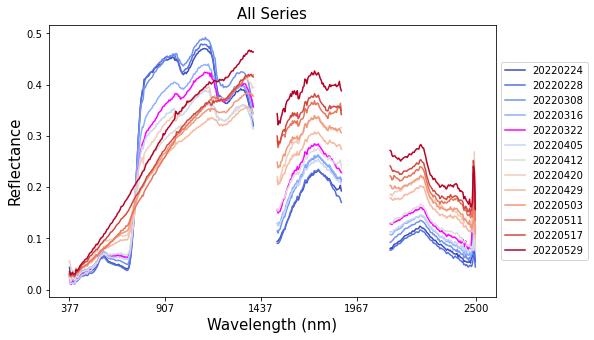

In [12]:
plot_reflectances_via_pixel(reflectances, series=True, highlight="20220322", remove_water_bands=True)

In [15]:
show_dynamic_visual_plot(DATES, reflectances)

interactive(children=(Dropdown(description='date', options=('20220224', '20220228', '20220308', '20220316', '2…